## 准备工作

1. [安装Anaconda和VSCode](https://zhuanlan.zhihu.com/p/88458083)

2. 新建虚拟环境

    ```
    # 打开终端

    # 新建环境
    conda create -n myvenv

    # 进入环境
    conda activate myvenv
    ```

3. [安装rdkit](https://www.rdkit.org/docs/index.html)

    rdkit是用于分子结构和性质的表示和计算的python库

## 对分子中存在的官能团进行标注

In [1]:
from rdkit import Chem

1. 用[SMILES](https://blog.csdn.net/xk6891/article/details/116380262)表示分子

In [2]:
smiles = 'CC=CCC'

2. 将SMILES转换为mol实例

```mol```存储着与分子结构和性质有关的信息

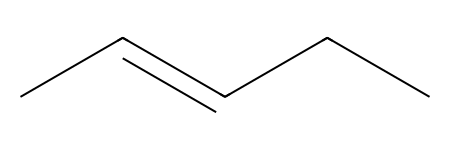

In [3]:
mol = Chem.MolFromSmiles(smiles)
mol

3. 用[SMARTS](https://zhuanlan.zhihu.com/p/477094703)定义一些官能团

(SMARTS和SMILES都可以表示分子的结构，但是SMARTS语法更复杂，能够表示比SMILES更复杂的信息)

In [4]:
alkane = '[CX4;H3,H2]'
alkene = '[CX3]=[CX3]'
alkyne = '[CX2]#[CX2]'
arene = '[cX3]1[cX3][cX3][cX3][cX3][cX3]1'
haloalkane = '[#6][F,Cl,Br,I]'
alcohol = '[#6][OX2H]'
aldehyde = '[CX3H1](=O)[#6,H]'
ketone = '[#6][CX3](=O)[#6]'
carboxylic_acid = '[CX3](=O)[OX2H]'
acid_anhydride = '[CX3](=[OX1])[OX2][CX3](=[OX1])'
acyl_halide = '[CX3](=[OX1])[F,Cl,Br,I]'
ester = '[#6][CX3](=O)[OX2H0][#6]'
ether = '[OD2]([#6])[#6]'
amine = '[NX3;H2,H1,H0;!$(NC=O)]'
amide = '[NX3][CX3](=[OX1])[#6]'
nitrile = '[NX1]#[CX2]'
imide = '[CX3](=[OX1])[NX3][CX3](=[OX1])'
imine = '[$([CX3]([#6])[#6]),$([CX3H][#6])]=[$([NX2][#6]),$([NX2H])]'
azo_compound = '[#6][NX2]=[NX2][#6]'
thiol = '[#16X2H]'
thial = '[CX3H1](=O)[#6,H]'
sulfone = '[#16X4](=[OX1])(=[OX1])([#6])[#6]'
sulfonic_acid = '[#16X4](=[OX1])(=[OX1])([#6])[OX2H]'
enol = '[OX2H][#6X3]=[#6]'
phenol = '[OX2H][cX3]:[c]'
hydrazine = '[NX3][NX3]'
enamine = '[NX3][CX3]=[CX3]'
isocyanate = '[NX2]=[C]=[O]'
isothiocyanate = '[NX2]=[C]=[S]'
phosphine = '[PX3]'
sulfonamide = '[#16X4]([NX3])(=[OX1])(=[OX1])[#6]'
sulfonate = '[#16X4](=[OX1])(=[OX1])([#6])[OX2H0]'
sulfoxide = '[#16X3]=[OX1]'
thioamide = '[NX3][CX3]=[SX1]'
hydrazone = '[NX3][NX2]=[#6]'
carbamate = '[NX3][CX3](=[OX1])[OX2H0]'
sulfide = '[#16X2H0]'

4. 把这些官能团放在一个列表里

In [5]:
fg_list = [
        alkane,
        alkene,
        alkyne,
        arene, 
        haloalkane, 
        alcohol,
        aldehyde,
        ketone, 
        carboxylic_acid, 
        acid_anhydride, 
        acyl_halide, 
        ester, 
        ether, 
        amine, 
        amide, 
        nitrile, 
        imide, 
        imine, 
        azo_compound,
        thiol, 
        thial, 
        sulfone, 
        sulfonic_acid, 
        enol, 
        phenol,
        hydrazine, 
        enamine, 
        isocyanate, 
        isothiocyanate,
        phosphine, 
        sulfonamide, 
        sulfonate, 
        sulfoxide, 
        thioamide, 
        hydrazone, 
        carbamate, 
        sulfide]

5. 把这些官能团的SMARTS也转为mol，同样用列表存储

In [6]:
fg_mols = []
for fg in fg_list:
    fg_mols.append(Chem.MolFromSmarts(fg))

6. mol实例本身的```HasSubstructMatch```方法可以接收一个官能团的mol，判断官能团是否存在于分子中：

In [7]:
'''
返回True表示分子中存在C=C'''
mol.HasSubstructMatch(fg_mols[1]) 

True

用这样的方法，可以判断列表中的哪些官能团存在于分子中，从而得到官能团的标签用于识别任务

判断下面的分子包含列表里的哪些官能团

In [14]:
smiles = 'NCCC(S)(Cc1ccccc1)CC(=O)O'

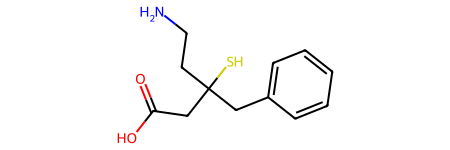

In [15]:
mol = Chem.MolFromSmiles(smiles)
mol

In [16]:
# 与所有官能团的匹配结果
label = [Chem.MolFromSmiles(smiles).HasSubstructMatch(i) for i in fg_mols]

# 存在的官能团
[fg_list[j] for j in range(len(label)) if label[j]]

['[CX4;H3,H2]',
 '[cX3]1[cX3][cX3][cX3][cX3][cX3]1',
 '[#6][OX2H]',
 '[CX3](=O)[OX2H]',
 '[NX3;H2,H1,H0;!$(NC=O)]',
 '[#16X2H]']